Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Feature names ['Volume', 'Doors']
Class names ['Jeep', 'Pickup', 'SUV', 'Sedan', 'Van']


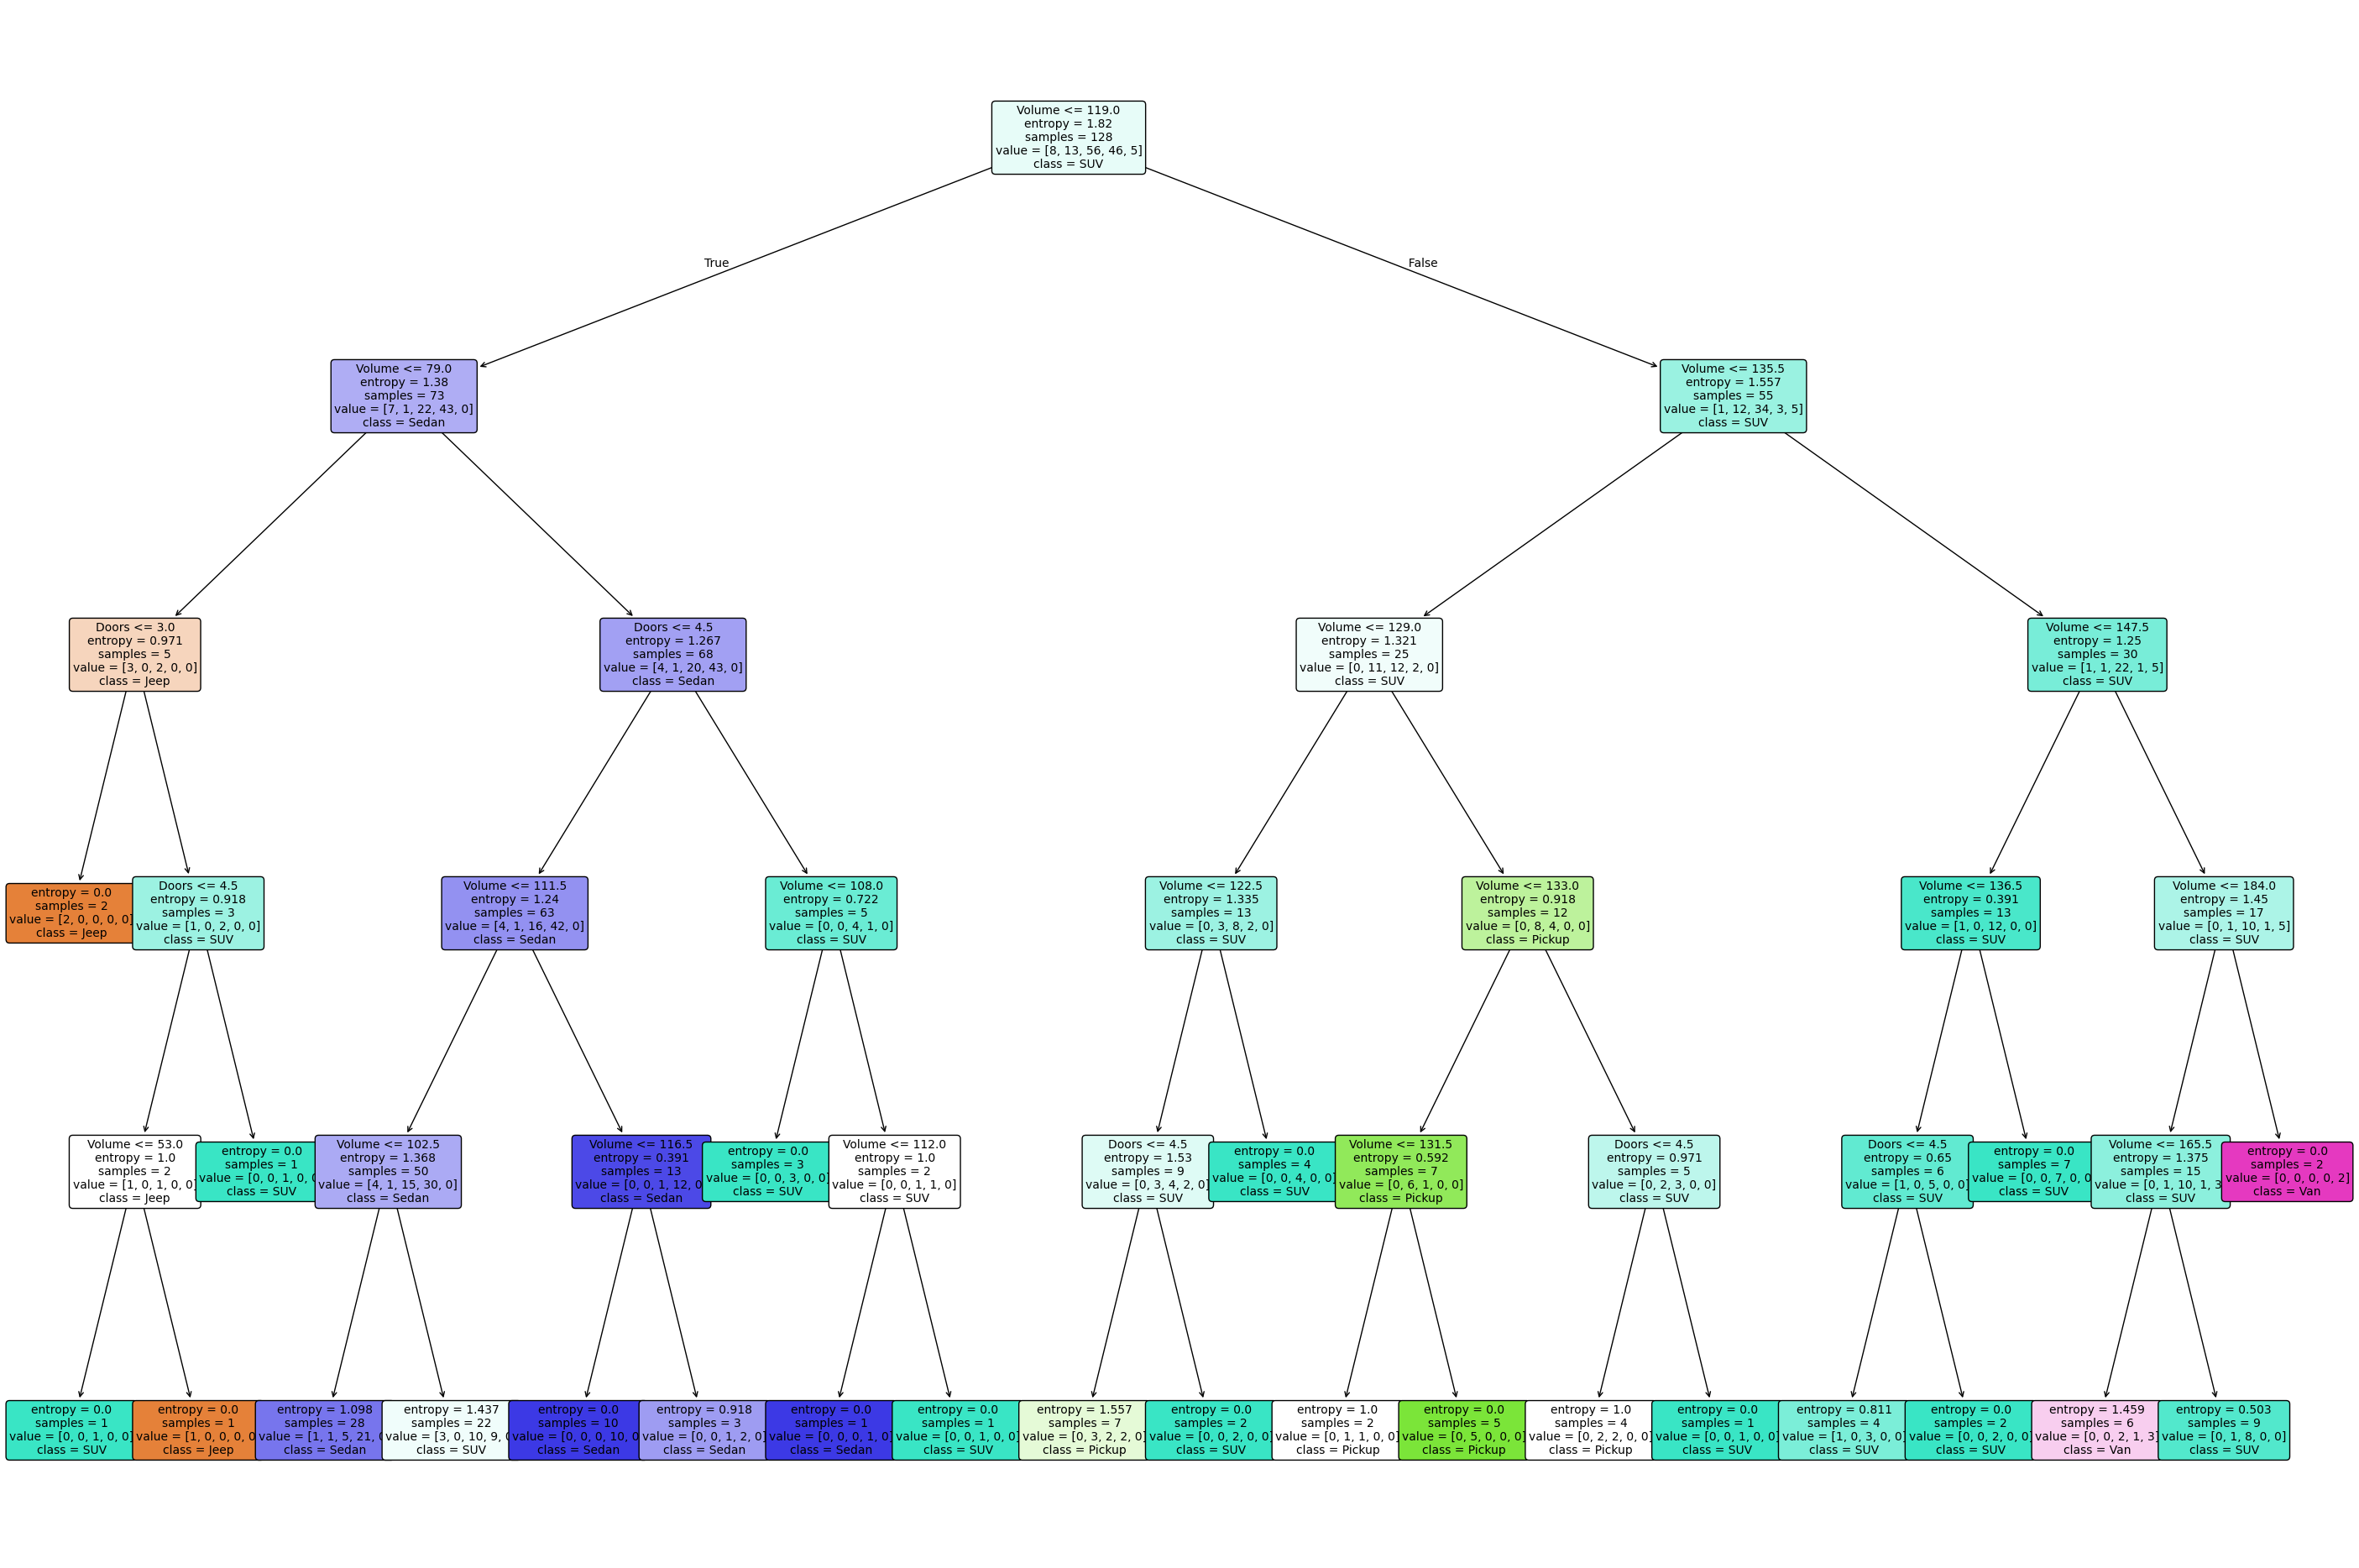

Test on training data
Feature names ['Volume', 'Doors']
Class names ['Jeep', 'Pickup', 'SUV', 'Sedan', 'Van']
Expected classes
['Pickup', 'SUV', 'Sedan', 'SUV', 'Jeep', 'Sedan', 'Van', 'SUV', 'Sedan', 'SUV', 'SUV', 'Pickup', 'Sedan', 'SUV', 'SUV', 'SUV', 'Pickup', 'SUV', 'SUV', 'Sedan', 'Sedan', 'Sedan', 'Sedan', 'SUV', 'Sedan', 'Sedan', 'Jeep', 'Sedan', 'SUV', 'SUV', 'Van', 'SUV']
Predicted classes
['Sedan', 'Sedan', 'SUV', 'Sedan', 'Pickup', 'Pickup', 'Sedan', 'Van', 'SUV', 'SUV', 'Van', 'SUV', 'SUV', 'SUV', 'Pickup', 'SUV', 'SUV', 'SUV', 'Sedan', 'Sedan', 'Sedan', 'Sedan', 'SUV', 'Sedan', 'Sedan', 'Sedan', 'SUV', 'SUV', 'Sedan', 'Jeep', 'SUV', 'SUV', 'Jeep', 'SUV', 'SUV', 'SUV', 'SUV', 'SUV', 'SUV', 'SUV', 'Sedan', 'Sedan', 'SUV', 'SUV', 'SUV', 'Van', 'Sedan', 'Pickup', 'Sedan', 'Pickup', 'Van', 'Sedan', 'SUV', 'Sedan', 'SUV', 'Sedan', 'Pickup', 'Sedan', 'SUV', 'SUV', 'Van', 'Pickup', 'Sedan', 'SUV', 'Sedan', 'SUV', 'Sedan', 'Sedan', 'SUV', 'SUV', 'SUV', 'SUV', 'SUV', 'Sedan', 'SUV'

In [23]:
# Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from google.colab import drive
drive.mount('/content/drive')
#--------------------------------------------------------------------------------------------------
def get_car_data():

    data = np.genfromtxt("/content/drive/MyDrive/Colab Notebooks/AllCars.csv", \
delimiter=',', names=True, filling_values=0, dtype=None, ndmin=1)
    # print(f"Extracting from {file_name} and got {data}")
#----Extract all except the last column name as feature names
    feature_names = list(data.dtype.names[:-1])
    print(f"Feature names {feature_names}")
#----Extract unique values from last column as class names
    class_names = np.unique(data[data.dtype.names[-1]]).tolist()
    print(f"Class names {class_names}")

#----Extract all except the last column as features
    features = data[feature_names].tolist()
    # print(f"Features are {features}")
#----Extract last column as classes, and convert to integers
    np_classes = list(data[data.dtype.names[-1]])
    classes = [str(item) for item in np_classes]
    # print(f"All classes {classes}")
#----Split off 20% for testing
    features_train,features_test,classes_train,classes_test = train_test_split(features,\
classes,test_size=0.20,random_state=1,stratify=classes)

    return features_train,classes_train,features_test,classes_test,feature_names,class_names
#--------------------------------------------------------------------------------------------------
#----Encode categorical features
    encoder = OrdinalEncoder(dtype=int)
    features_train = encoder.fit_transform(features_train_raw)
    for index, feature in enumerate(feature_names):
        print(f"Feature: {feature}")
        for code, category in enumerate(encoder.categories_[index]):
            print(f"  {category} -> {code}")
    features_test = encoder.transform(features_test_raw)
    # print(f"Features\n{features_train_raw}\nClasses\n{classes_train_raw}\nTest features\n{features_test_raw}")
    # print(f"Encoded features\n{features_train}\nEncoded classes\n{classes_train}\nEncoded test\n{features_test}")

    return features_train,classes_train,features_test,classes_test,feature_names,class_names
#--------------------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------------------
def get_data(which):
    if which == "cars":
        return get_car_data()
    else:
        return None
#--------------------------------------------------------------------------------------------------
def show_data(features_train,classes_train,features_test,feature_names,class_names):

    print(f"Feature names\n{feature_names}")
    print(f"Class names\n{class_names}")
    print(f"Training features\n{features_train}")
    print(f"Training classes\n{classes_train}")
    print(f"Testing features\n{features_test}")

#--------------------------------------------------------------------------------------------------
#----Learn decision tree
def learn_tree(features_train,classes_train,criterion,max_depth):

#----You can adjust parameters like 'criterion' (gini or entropy) and 'max_depth'
    decision_tree = DecisionTreeClassifier(criterion=criterion,max_depth=max_depth,random_state=1)

#----Train the Decision Tree model on the training data
    decision_tree.fit(features_train, classes_train)

    return(decision_tree)
#--------------------------------------------------------------------------------------------------
def visualise_tree(decision_tree,feature_names,class_names):

    plt.figure(figsize=(36,24))
    plot_tree(decision_tree,
          feature_names = feature_names,
          class_names = class_names,
          filled = True,
          rounded = True,
          fontsize = 10)
    plt.show()

#--------------------------------------------------------------------------------------------------
def print_predictions(classes_test,classes_predicted,accuracy,class_names):
  features_train,classes_train,features_test,classes_test,feature_names,class_names = \
get_data("cars")
  print(f"Expected classes\n{classes_test}\nPredicted classes\n{classes_predicted}")
  print(f"Accuracy: {accuracy:.2f}")
  print(f"Test Data: {features_test}")

#--------------------------------------------------------------------------------------------------
def main():

    features_train,classes_train,features_test,classes_test,feature_names,class_names = \
get_data("cars")
    # show_data(features_train,classes_train,features_test,feature_names,class_names)
#----Learn the tree
    decision_tree = learn_tree(features_train,classes_train,"entropy",5)
    visualise_tree(decision_tree,feature_names,class_names)
#----Test on the training data - should be 100% accurate
    print("Test on training data")
    classes_predicted = decision_tree.predict(features_train).tolist()
    accuracy = accuracy_score(classes_train,classes_predicted)
    print_predictions(classes_train,classes_predicted,accuracy,class_names)
#----Now predict some unknowns
    print("Test on testing data")
    classes_predicted = decision_tree.predict(features_test).tolist()
    accuracy = accuracy_score(classes_test,classes_predicted)
    print_predictions(classes_test,classes_predicted,accuracy,class_names)
#--------------------------------------------------------------------------------------------------
if __name__ == "__main__":
    main()
#--------------------------------------------------------------------------------------------------
